In [46]:
import numpy as np
import pandas as pd

In [47]:
df=pd.read_csv("knn_dataset_int.csv")

In [48]:
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,42,6,48,72,40,1,2,1,0,2
1,76,78,53,68,92,1,1,1,1,0
2,98,90,26,7,31,2,0,1,0,1
3,83,63,9,12,62,1,1,0,0,1
4,92,34,60,53,7,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
995,5,72,64,75,57,1,2,1,1,2
996,77,5,64,85,33,0,2,0,0,2
997,55,74,2,41,61,2,0,0,1,2
998,5,5,62,19,20,2,2,0,0,1


In [49]:
df.dtypes

Feature_1    int64
Feature_2    int64
Feature_3    int64
Feature_4    int64
Feature_5    int64
Feature_6    int64
Feature_7    int64
Feature_8    int64
Feature_9    int64
Target       int64
dtype: object

In [50]:
x=df.drop(columns=['Feature_1'])
y=df['Feature_1']

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [53]:
x_scaled

array([[-1.48143585, -0.05971475,  0.73018444, ...,  0.96462528,
        -0.97823676,  1.21570628],
       [ 0.99686014,  0.11099637,  0.59549513, ...,  0.96462528,
         1.02224741, -1.25022938],
       [ 1.40990947, -0.81084365, -1.45851691, ...,  0.96462528,
        -0.97823676, -0.01726155],
       ...,
       [ 0.85917703, -1.63025699, -0.31365774, ..., -1.03667198,
         1.02224741,  1.21570628],
       [-1.51585663,  0.41827637, -1.05444897, ..., -1.03667198,
        -0.97823676, -0.01726155],
       [ 1.3754887 ,  1.5108275 ,  1.30261403, ...,  0.96462528,
        -0.97823676, -1.25022938]])

In [54]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier()


In [72]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred_train=knn.predict(x_train)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
acc=accuracy_score(y_train,y_pred_train)

In [76]:
acc

0.21

In [77]:
y_pred=knn.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred)

0.0

# k value

In [81]:
score_train=[]
test=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    score_train.append(accuracy_score(y_train,y_pred_train))
    test.append(accuracy_score(y_test,y_pred_test))

print(score_train)

[1.0, 0.51125, 0.33375, 0.255, 0.21, 0.185, 0.16875, 0.15625, 0.14875, 0.14125, 0.13875, 0.1275, 0.11875, 0.11125, 0.10375, 0.09875, 0.09875, 0.09125, 0.09125, 0.0925]


In [82]:
s=pd.DataFrame(score_train)

In [84]:
s.max

<bound method DataFrame.max of           0
0   1.00000
1   0.51125
2   0.33375
3   0.25500
4   0.21000
5   0.18500
6   0.16875
7   0.15625
8   0.14875
9   0.14125
10  0.13875
11  0.12750
12  0.11875
13  0.11125
14  0.10375
15  0.09875
16  0.09875
17  0.09125
18  0.09125
19  0.09250>

In [85]:
import matplotlib.pyplot as plt


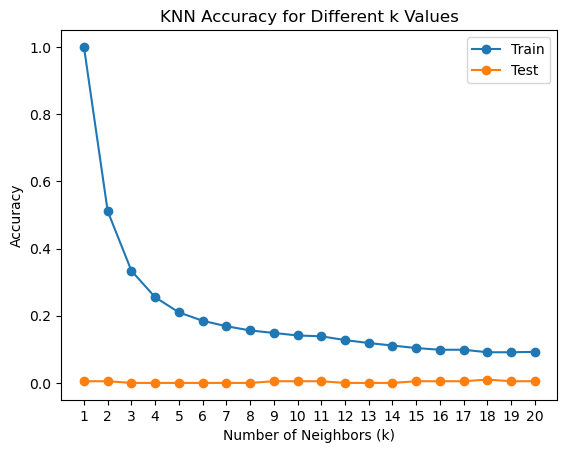

In [87]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), score_train, marker='o', label='Train')  # ✅ Fix here
plt.plot(range(1, 21), test, marker='o', label='Test')  # ✅ Fix here
plt.xticks(range(1, 21))  # ✅ Fix xticks
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.show()  # ✅ Always add this to display the plot
